# jonathan's code

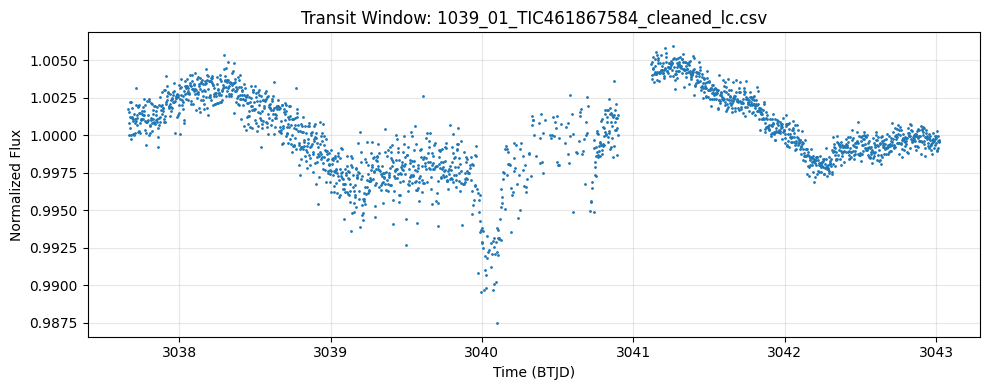

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_best_transit_window(csv_file, 
                             time_col='time_btjd', 
                             flux_col='flux_normalized',
                             window_points=2000):

    # --- Load data ---
    data = pd.read_csv(csv_file)
    t = data[time_col].values
    flux = data[flux_col].values

    # Remove NaNs
    valid = np.isfinite(t) & np.isfinite(flux)
    t = t[valid]
    flux = flux[valid]

    # --- STEP 1: Find the transit dip (minimum flux value) ---
    dip_index = np.argmin(flux)

    # --- STEP 2: Define the window around the dip ---
    half = window_points // 2
    start = max(0, dip_index - half)
    end = min(len(t), dip_index + half)

    # Slice window
    t_win = t[start:end]
    flux_win = flux[start:end]

    # --- STEP 3: Plot ---
    plt.figure(figsize=(10, 4))
    plt.plot(t_win, flux_win, marker='.', linestyle='none', markersize=2)
    plt.xlabel("Time (BTJD)")
    plt.ylabel("Normalized Flux")
    plt.title(f"Transit Window: {csv_file}")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# plot curve
plot_best_transit_window("1039_01_TIC461867584_cleaned_lc.csv")
